# Q3 & Q4
    Name: Yuanze Li,  Matric number: 17202086

# Q3

In [61]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#show all the rows
pd.set_option('display.max_columns', None)
#show all the columns
pd.set_option('display.max_rows', None)

In [3]:
hotel = pd.read_csv('tokyo_hotels.csv')

In [4]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
room_kind        200 non-null object
room_name        200 non-null object
room_facility    200 non-null object
room_price       200 non-null int64
room_star        200 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB


In [5]:
hotel['kitchen'] = hotel['room_facility'].str.contains('Kitchen')
hotel['kitchen'] = hotel['kitchen'] + 0
hotel['Air conditioning'] = hotel['room_facility'].str.contains('Air conditioning')
hotel['Air conditioning'] = hotel['Air conditioning'] + 0
hotel['Hair dryer'] = hotel['room_facility'].str.contains('Hair dryer')
hotel['Hair dryer'] = hotel['Hair dryer'] + 0
hotel['Wifi'] = hotel['room_facility'].str.contains('Wifi')
hotel['Wifi'] = hotel['Wifi'] + 0
hotel['Studio'] = hotel['room_facility'].str.contains('Studio')
hotel['Studio'] = hotel['Studio'] + 0

In [6]:
hotel

,room_kind,room_name,room_facility,room_price,room_star,kitchen,Air conditioning,Hair dryer,Wifi,Studio
0,Entire apartment in Katsushika,J's APT 2 Bed Rooms + Free Portable Wi-Fi,4 guests · 2 bedrooms · 4 beds · 1.5 bathsKitc...,103,4.90,1,1,1,1,0
1,Entire apartment in Shibuya-ku,Calm House near Shinjuku/Shibuya #105,3 guests · 1 bedroom · 1 bed · 1 bathKitchen ·...,33,4.88,1,1,1,1,0
2,"Entire apartment in Shibuya-ku,",Calm House near Shinjuku/Shibuya#503,2 guests · 1 bedroom · 2 beds · 1 bathKitchen ...,28,4.78,1,1,1,1,0
3,Entire apartment in Shinjuku City,Shinjuku! Free Wi-Fi + Good Location + Clean R...,4 guests · 1 bedroom · 2 beds · 1 bathKitchen ...,41,4.78,1,1,1,1,0
4,"Tiny house in Sakuho, Minamisaku District","Sanson Terrace ""off-grid tiny cottage""",3 guests · Studio · 2 beds · 0 bathsKitchen · ...,98,4.95,1,0,0,1,1
5,Entire apartment in Shibuya-ku,Calm House near Shinjuku/Shibuya #301,4 guests · 1 bedroom · 4 beds · 1 bathKitchen ...,37,4.86,1,1,1,1,0
6,Entire house in Katsushika,Pine House 2 Bed Room + 2 Toilets,4 guests · 2 bedrooms · 4 beds · 2.5 bathsKitc...,103,4.93,1,1,1,1,0
7,Entire apartment in Suginami-ku,apartment hotel TASU TOCO,3 guests · 1 bedroom · 3 beds · 1 bathKitchen ...,72,4.74,1,1,1,1,0
8,Entire apartment in Shinjuku-ku,7min Sta. Easy to Shinjuku - cozy room#302,3 guests · 1 bedroom · 1 bed · 1 bathKitchen ·...,37,4.68,1,1,1,1,0
9,Entire apartment in Shibuya,Calm House near Shinjuku/Shibuya #305,6 guests · 1 bedroom · 5 beds · 1 bathKitchen ...,42,4.82,1,1,1,1,0


In [7]:
import re

In [8]:
bedroom = []
for i in hotel['room_facility']:
    a = re.findall(r"([0-9]?)\sbedroom", i)
    if len(a) == 0:
        bedroom.append('0')
    else :
        bedroom.append(a[0])
    
print(bedroom)

['2', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '0', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3']

In [9]:
hotel['bedroom'] = bedroom
hotel['bedroom'] = hotel['bedroom'].astype('int')

In [10]:
hotel['room_facility'] = hotel['room_facility'].str.replace('+','')

In [11]:
guests = []
for i in hotel['room_facility']:
    a = re.findall(r"([1-9][0-9]?)\sguest", i)
    if len(a) == 0:
        guests.append('0')
    else :
        guests.append(a[0])
    
print(guests)

['4', '3', '2', '4', '3', '4', '4', '3', '3', '6', '6', '2', '6', '15', '16', '8', '2', '4', '4', '2', '3', '2', '4', '2', '2', '2', '4', '3', '1', '3', '2', '4', '4', '15', '12', '10', '9', '7', '6', '6', '4', '3', '2', '4', '3', '4', '4', '3', '3', '6', '6', '2', '6', '15', '16', '8', '2', '4', '4', '2', '3', '2', '4', '2', '2', '2', '4', '3', '1', '3', '2', '4', '4', '15', '12', '10', '9', '7', '6', '6', '4', '3', '2', '4', '3', '4', '4', '3', '3', '6', '6', '2', '6', '15', '16', '8', '2', '4', '4', '2', '3', '2', '4', '2', '2', '2', '4', '3', '1', '3', '2', '4', '4', '15', '12', '10', '9', '7', '6', '6', '4', '3', '2', '4', '3', '4', '4', '3', '3', '6', '6', '2', '6', '15', '16', '8', '2', '4', '4', '2', '3', '2', '4', '2', '2', '2', '4', '3', '1', '3', '2', '4', '4', '15', '12', '10', '9', '7', '6', '6', '4', '3', '2', '4', '3', '4', '4', '3', '3', '6', '6', '2', '6', '15', '16', '8', '2', '4', '4', '2', '3', '2', '4', '2', '2', '2', '4', '3', '1', '3', '2', '4', '4', '15', '12', 

In [12]:
hotel['guests'] = bedroom
hotel['guests'] = hotel['guests'].astype('int')

In [13]:
bed = []
for i in hotel['room_facility']:
    a = re.findall(r"([1-9][0-9]?)\sbed", i)
    if len(a) == 0:
        bed.append('0')
    else :
        bed.append(a[0])
    
print(bed)

['2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3', '2', '1', '1', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '4', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '1', '4', '3', '4', '2', '3', '2', '3']

In [14]:
hotel['bed'] = bed
hotel['bed'] = hotel['bed'].astype('int')

In [15]:
bath=[]
for i in hotel['room_facility']:
    a = re.findall(r"([1-9]\.?[0-9]?)\sbath", i)
    if len(a) == 0:
        bath.append('0')
    else :
        bath.append(a[0])
    
print(bath)

['1.5', '1', '1', '1', '0', '1', '2.5', '1', '1', '1', '1.5', '0', '1.5', '2', '1', '1', '1', '1.5', '0', '1.5', '1', '0', '0', '0', '1.5', '0', '0', '2', '1', '1', '2', '1', '1', '7.5', '1', '1.5', '1', '2', '1.5', '1', '1.5', '1', '1', '1', '0', '1', '2.5', '1', '1', '1', '1.5', '0', '1.5', '2', '1', '1', '1', '1.5', '0', '1.5', '1', '0', '0', '0', '1.5', '0', '0', '2', '1', '1', '2', '1', '1', '7.5', '1', '1.5', '1', '2', '1.5', '1', '1.5', '1', '1', '1', '0', '1', '2.5', '1', '1', '1', '1.5', '0', '1.5', '2', '1', '1', '1', '1.5', '0', '1.5', '1', '0', '0', '0', '1.5', '0', '0', '2', '1', '1', '2', '1', '1', '7.5', '1', '1.5', '1', '2', '1.5', '1', '1.5', '1', '1', '1', '0', '1', '2.5', '1', '1', '1', '1.5', '0', '1.5', '2', '1', '1', '1', '1.5', '0', '1.5', '1', '0', '0', '0', '1.5', '0', '0', '2', '1', '1', '2', '1', '1', '7.5', '1', '1.5', '1', '2', '1.5', '1', '1.5', '1', '1', '1', '0', '1', '2.5', '1', '1', '1', '1.5', '0', '1.5', '2', '1', '1', '1', '1.5', '0', '1.5', '1', '0

In [16]:
hotel['bath'] = bath
hotel['bath'] = hotel['bath'].astype('float')

In [17]:
shared_bath=[]
for i in hotel['room_facility']:
    a = re.findall(r"([1-9]\.?[0-9]?)\sshared", i)
    if len(a) == 0:
        shared_bath.append('0')
    else :
        shared_bath.append(a[0])
    
print(shared_bath)

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '2', '1', '0', '1', '2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [18]:
hotel['shared_bath'] = shared_bath
hotel['shared_bath'] = hotel['shared_bath'].astype('int')

In [58]:
hotel

,room_kind,room_name,room_facility,room_price,room_star,kitchen,Air conditioning,Hair dryer,Wifi,Studio,bedroom,guests,bed,bath,shared_bath
0,Entire apartment in Katsushika,J's APT 2 Bed Rooms + Free Portable Wi-Fi,4 guests · 2 bedrooms · 4 beds · 1.5 bathsKitc...,103,4.90,1,1,1,1,0,2,2,2,1.5,0
1,Entire apartment in Shibuya-ku,Calm House near Shinjuku/Shibuya #105,3 guests · 1 bedroom · 1 bed · 1 bathKitchen ·...,33,4.88,1,1,1,1,0,1,1,1,1.0,0
2,"Entire apartment in Shibuya-ku,",Calm House near Shinjuku/Shibuya#503,2 guests · 1 bedroom · 2 beds · 1 bathKitchen ...,28,4.78,1,1,1,1,0,1,1,1,1.0,0
3,Entire apartment in Shinjuku City,Shinjuku! Free Wi-Fi + Good Location + Clean R...,4 guests · 1 bedroom · 2 beds · 1 bathKitchen ...,41,4.78,1,1,1,1,0,1,1,1,1.0,0
4,"Tiny house in Sakuho, Minamisaku District","Sanson Terrace ""off-grid tiny cottage""",3 guests · Studio · 2 beds · 0 bathsKitchen · ...,98,4.95,1,0,0,1,1,0,0,2,0.0,0
5,Entire apartment in Shibuya-ku,Calm House near Shinjuku/Shibuya #301,4 guests · 1 bedroom · 4 beds · 1 bathKitchen ...,37,4.86,1,1,1,1,0,1,1,1,1.0,0
6,Entire house in Katsushika,Pine House 2 Bed Room + 2 Toilets,4 guests · 2 bedrooms · 4 beds · 2.5 bathsKitc...,103,4.93,1,1,1,1,0,2,2,2,2.5,0
7,Entire apartment in Suginami-ku,apartment hotel TASU TOCO,3 guests · 1 bedroom · 3 beds · 1 bathKitchen ...,72,4.74,1,1,1,1,0,1,1,1,1.0,0
8,Entire apartment in Shinjuku-ku,7min Sta. Easy to Shinjuku - cozy room#302,3 guests · 1 bedroom · 1 bed · 1 bathKitchen ·...,37,4.68,1,1,1,1,0,1,1,1,1.0,0
9,Entire apartment in Shibuya,Calm House near Shinjuku/Shibuya #305,6 guests · 1 bedroom · 5 beds · 1 bathKitchen ...,42,4.82,1,1,1,1,0,1,1,1,1.0,0


In [19]:
hotel.to_csv('tokyo_hotel_new.csv')

# Feature selection

In [20]:
X = hotel[['kitchen','Air conditioning','Hair dryer','Wifi','Studio','bedroom','guests','bed','bath','shared_bath','room_star']]

In [21]:
y = hotel['room_price']

# split the data

In [22]:
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, random_state=42)

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


# Build the decision tree model

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [24]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.7333333333333333


# evaluate the model

In [25]:
y_model = model.predict(X_test)

In [26]:
accuracy_score(y_test, y_model)  # Answer: accuracy score < 100%

0.7333333333333333

In [27]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# Visualize the decision tree

In [28]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("my_decision_tree.png") # saved in the following file - will return True if successful

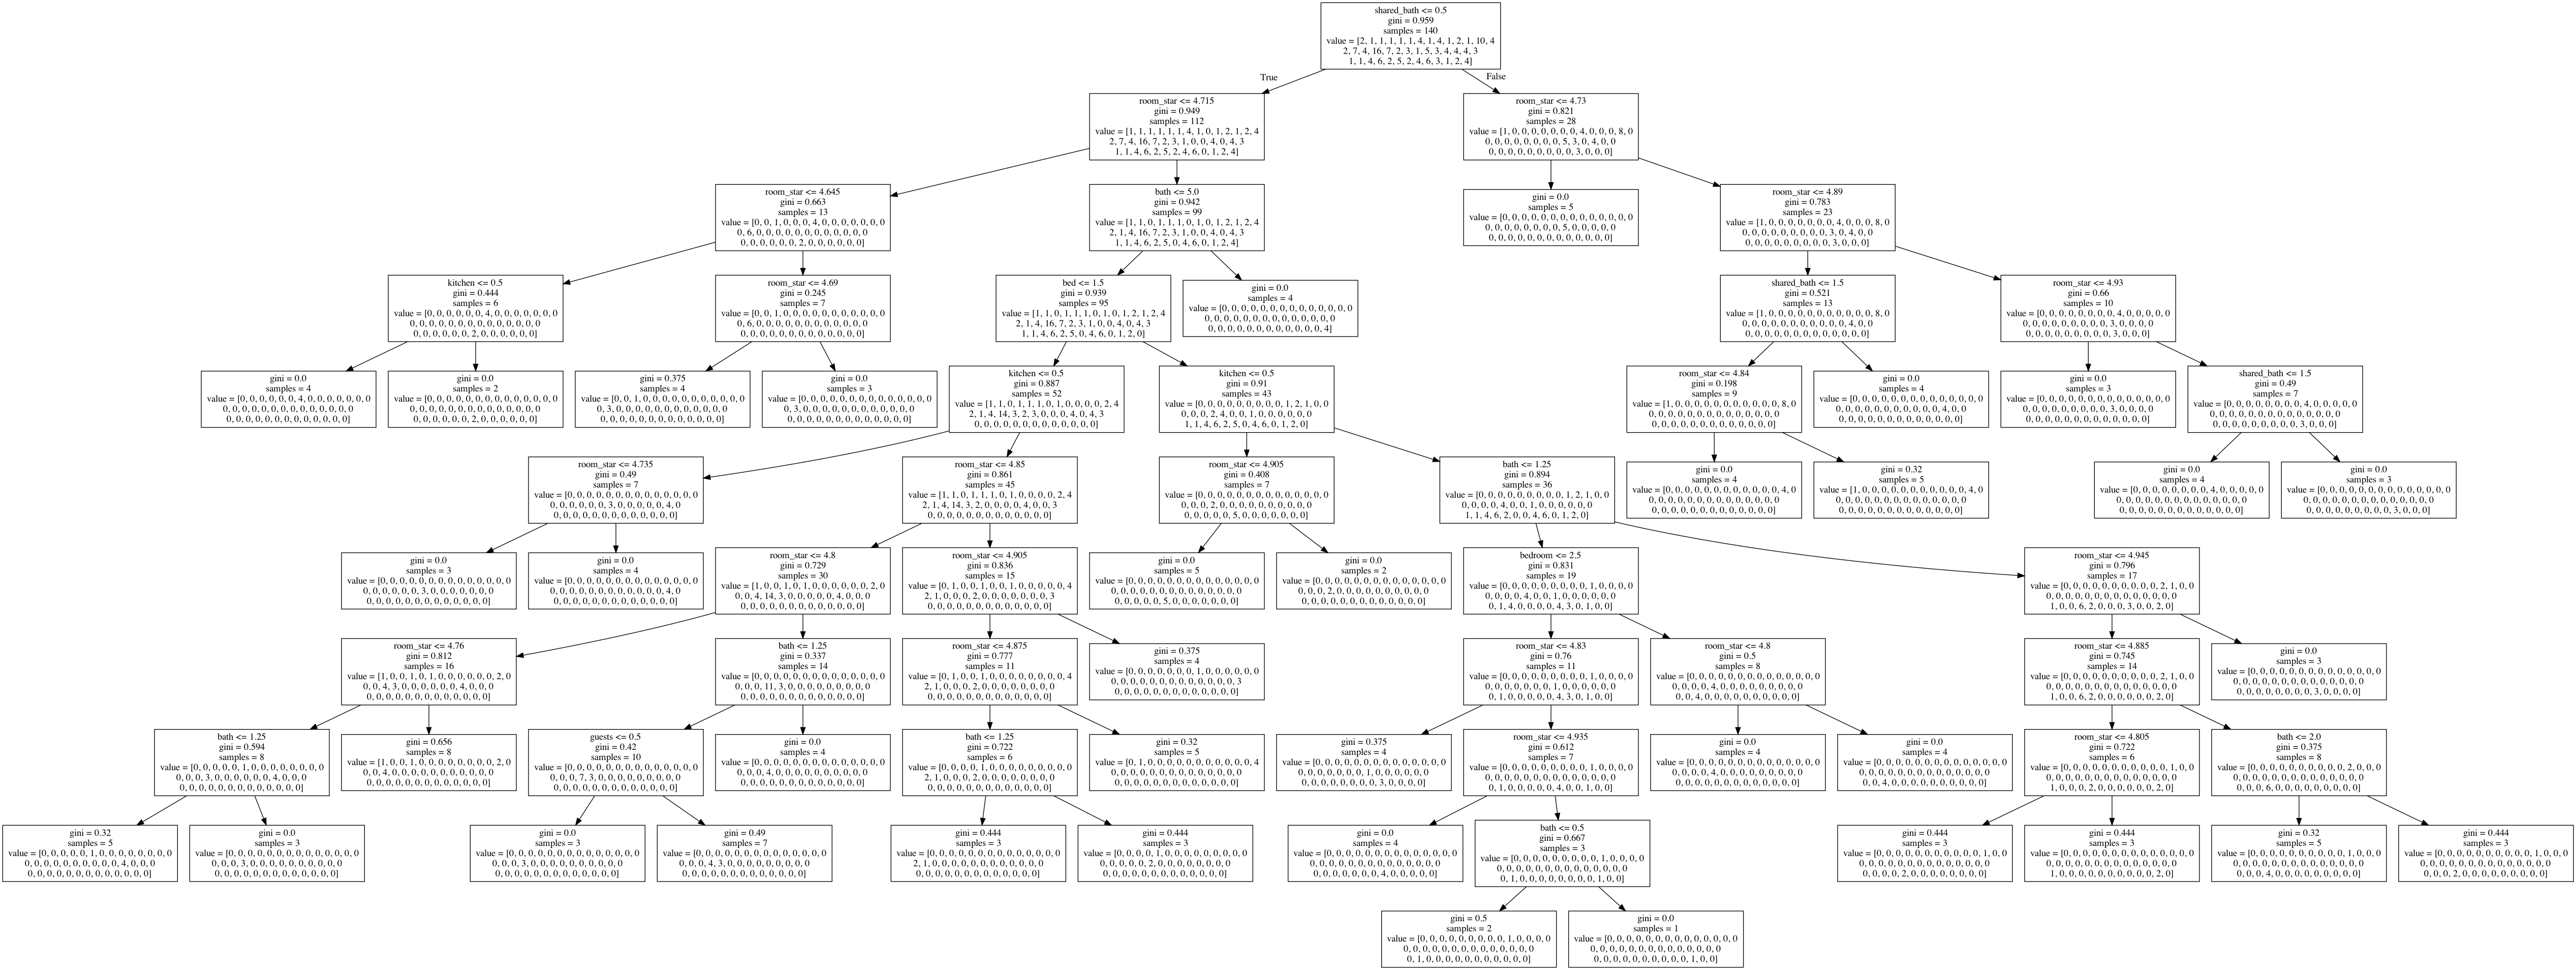

# Q4

## make the data ready for Apriori Algorithm

In [29]:
facility = hotel.loc[: , 'kitchen':'shared_bath']

In [30]:
facility

,kitchen,Air conditioning,Hair dryer,Wifi,Studio,bedroom,guests,bed,bath,shared_bath
0,1,1,1,1,0,2,2,2,1.5,0
1,1,1,1,1,0,1,1,1,1.0,0
2,1,1,1,1,0,1,1,1,1.0,0
3,1,1,1,1,0,1,1,1,1.0,0
4,1,0,0,1,1,0,0,2,0.0,0
5,1,1,1,1,0,1,1,1,1.0,0
6,1,1,1,1,0,2,2,2,2.5,0
7,1,1,1,1,0,1,1,1,1.0,0
8,1,1,1,1,0,1,1,1,1.0,0
9,1,1,1,1,0,1,1,1,1.0,0


## transform the numeric data into categorical 

In [31]:
facility['kitchen'][facility['kitchen'] != 0] = 'kitchen'
facility['kitchen'][facility['kitchen'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
facility['Air conditioning'][facility['Air conditioning'] != 0] = 'Air conditioning'
facility['Air conditioning'][facility['Air conditioning'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
facility['Hair dryer'][facility['Hair dryer'] != 0] = 'Hair dryer'
facility['Hair dryer'][facility['Hair dryer'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
facility['Wifi'][facility['Wifi'] != 0] = 'Wifi'
facility['Wifi'][facility['Wifi'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
facility['Studio'][facility['Studio'] != 0] = 'Studio'
facility['Studio'][facility['Studio'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
facility['bedroom'][facility['bedroom'] != 0] = 'bedroom'
facility['bedroom'][facility['bedroom'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
facility['guests'][facility['guests'] != 0] = 'guests'
facility['guests'][facility['guests'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
facility['bed'][facility['bed'] != 0] = 'bed'
facility['bed'][facility['bed'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
facility['bath'][facility['bath'] != 0] = 'bath'
facility['bath'][facility['bath'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
facility['shared_bath'][facility['shared_bath'] != 0] = 'shared_bath'
facility['shared_bath'][facility['shared_bath'] == 0] = np.nan

/Users/Andy_Lee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
facility

,kitchen,Air conditioning,Hair dryer,Wifi,Studio,bedroom,guests,bed,bath,shared_bath
0,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
1,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
2,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
3,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
4,kitchen,NaN,NaN,Wifi,Studio,NaN,NaN,bed,NaN,NaN
5,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
6,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
7,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
8,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN
9,kitchen,Air conditioning,Hair dryer,Wifi,NaN,bedroom,guests,bed,bath,NaN


I have finished transforming the numeric data into categorical. 

The Apriori library we are going to use requires our dataset to be in the form of a list of lists, where the whole dataset is a big list and each facility in the dataset is an inner list within the outer big list. 

In [42]:
records = []
for i in range(0, 199):
    records.append([str(facility.values[i,j]) for j in range(0, 10)])

In [43]:
records

[['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'nan',
  'nan',
  'Wifi',
  'Studio',
  'nan',
  'nan',
  'bed',
  'nan',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning',
  'Hair dryer',
  'Wifi',
  'nan',
  'bedroom',
  'guests',
  'bed',
  'bath',
  'nan'],
 ['kitchen',
  'Air conditioning'

In [44]:
#get rid of all the nan's
for i in records:
    i[:] = (value for value in i if value != 'nan')

In [45]:
# store the current data for the F-P growth analysis
records_fp = records

Then I need to make every list in the big list in the same length.

In [59]:
max_len =max((len(l) for l in records))

In [47]:
for i in records:
    length = len(i)
    for j in range(length,max_len):
        i.append('nan')

## Apriori Algorithm

In [48]:
from apyori import apriori

In [49]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [50]:
print(len(association_results))

64


In [51]:
association_results

[RelationRecord(items=frozenset({'Studio', 'nan'}), support=0.05025125628140704, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Studio'}), items_add=frozenset({'nan'}), confidence=1.0, lift=4.4222222222222225), OrderedStatistic(items_base=frozenset({'nan'}), items_add=frozenset({'Studio'}), confidence=0.22222222222222224, lift=4.4222222222222225)]),
 RelationRecord(items=frozenset({'Air conditioning', 'nan', 'Studio'}), support=0.02512562814070352, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Air conditioning', 'Studio'}), items_add=frozenset({'nan'}), confidence=1.0, lift=4.4222222222222225)]),
 RelationRecord(items=frozenset({'Studio', 'Hair dryer', 'nan'}), support=0.02512562814070352, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Studio', 'Hair dryer'}), items_add=frozenset({'nan'}), confidence=1.0, lift=4.4222222222222225)]),
 RelationRecord(items=frozenset({'Studio', 'Wifi', 'nan'}), support=0.05025125628140704, ordered_statistics=[Ordere

## Visualize the apriori result

Exuecute the code below and you will see all the rules returned by the apriori class.

In [52]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: Studio -> nan
Support: 0.05025125628140704
Confidence: 1.0
Lift: 4.4222222222222225
Rule: Air conditioning -> nan
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.4222222222222225
Rule: Studio -> Hair dryer
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.4222222222222225
Rule: Studio -> Wifi
Support: 0.05025125628140704
Confidence: 1.0
Lift: 4.975
Rule: Studio -> bath
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.4222222222222225
Rule: Studio -> nan
Support: 0.05025125628140704
Confidence: 1.0
Lift: 4.4222222222222225
Rule: Studio -> nan
Support: 0.05025125628140704
Confidence: 1.0
Lift: 13.266666666666667
Rule: Air conditioning -> Hair dryer
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.975
Rule: Air conditioning -> nan
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.975
Rule: Air conditioning -> bath
Support: 0.02512562814070352
Confidence: 1.0
Lift: 5.685714285714285
Rule: Air conditioning -> nan
Support: 0.02512562814070352
Confidence: 1.0
Lift: 4.

## F-P Growth Analysis

In [53]:
import pyfpgrowth

In [54]:
patterns = pyfpgrowth.find_frequent_patterns(records_fp, 2)

## print the frequently occurring itemsets

In [55]:
patterns

{('Studio', 'bath'): 5,
 ('Studio', 'bath', 'bed'): 5,
 ('Studio', 'Wifi', 'bath'): 5,
 ('Studio', 'bath', 'kitchen'): 5,
 ('Studio', 'bath', 'nan'): 5,
 ('Studio', 'Wifi', 'bath', 'bed'): 5,
 ('Studio', 'bath', 'bed', 'kitchen'): 5,
 ('Studio', 'bath', 'bed', 'nan'): 5,
 ('Studio', 'Wifi', 'bath', 'kitchen'): 5,
 ('Studio', 'Wifi', 'bath', 'nan'): 5,
 ('Studio', 'bath', 'kitchen', 'nan'): 5,
 ('Studio', 'Wifi', 'bath', 'bed', 'kitchen'): 5,
 ('Studio', 'Wifi', 'bath', 'bed', 'nan'): 5,
 ('Studio', 'bath', 'bed', 'kitchen', 'nan'): 5,
 ('Studio', 'Wifi', 'bath', 'kitchen', 'nan'): 5,
 ('Studio', 'Wifi', 'bath', 'bed', 'kitchen', 'nan'): 5,
 ('Hair dryer', 'Studio'): 5,
 ('Hair dryer', 'Studio', 'bath'): 5,
 ('Hair dryer', 'Studio', 'bed'): 5,
 ('Hair dryer', 'Studio', 'Wifi'): 5,
 ('Hair dryer', 'Studio', 'kitchen'): 5,
 ('Hair dryer', 'Studio', 'nan'): 5,
 ('Hair dryer', 'Studio', 'bath', 'bed'): 5,
 ('Hair dryer', 'Studio', 'Wifi', 'bath'): 5,
 ('Hair dryer', 'Studio', 'bath', 'kitch

## Mine the Association Rules

In [56]:
rules = pyfpgrowth.generate_association_rules(patterns, .5)

## print the association rules

In [57]:
rules

{('Studio',
  'bath'): (('Air conditioning',
   'Hair dryer',
   'Wifi',
   'bed',
   'kitchen',
   'nan'), 1.0),
 ('Studio', 'kitchen'): (('bed', 'nan'), 3.0),
 ('Studio',
  'Wifi',
  'bath'): (('Air conditioning', 'Hair dryer', 'bed', 'kitchen', 'nan'), 1.0),
 ('Studio', 'Wifi', 'bed'): (('kitchen', 'nan'), 2.5),
 ('Studio',
  'bath',
  'bed'): (('Air conditioning', 'Hair dryer', 'Wifi', 'kitchen', 'nan'), 1.0),
 ('Studio',
  'bath',
  'kitchen'): (('Air conditioning', 'Hair dryer', 'Wifi', 'bed', 'nan'), 1.0),
 ('Studio',
  'bath',
  'nan'): (('Air conditioning', 'Hair dryer', 'Wifi', 'bed', 'kitchen'), 1.0),
 ('Studio', 'Wifi', 'kitchen'): (('bed', 'nan'), 2.5),
 ('bath',
  'kitchen',
  'nan'): (('Air conditioning', 'Hair dryer', 'Wifi', 'bed'), 0.5),
 ('Studio',
  'Wifi',
  'bath',
  'bed'): (('Air conditioning', 'Hair dryer', 'kitchen', 'nan'), 1.0),
 ('Studio',
  'Wifi',
  'bath',
  'kitchen'): (('Air conditioning', 'Hair dryer', 'bed', 'nan'), 1.0),
 ('Studio', 'Wifi', 'bed', '